In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv("Fish.csv")

In [3]:
dataset.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
dataset.isnull().any()

Species    False
Weight     False
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

In [5]:
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()
dataset["Species"] = le.fit_transform(dataset["Species"])

In [6]:
dataset.head(1)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.52,4.02


In [7]:
x = dataset.iloc[:,2:7].values

In [8]:
y = dataset.iloc[:,1].values

In [9]:
x.shape

(159, 5)

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer([("oh",OneHotEncoder(),[3])],remainder="passthrough")
x=ct.fit_transform(x)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [11]:
x

<159x22 sparse matrix of type '<class 'numpy.float64'>'
	with 795 stored elements in Compressed Sparse Row format>

In [12]:
x.shape

(159, 22)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
ypred = mlr.predict(x_test)

In [16]:
ypred

array([ 448.02659616,   39.97701923,  155.98713081,   82.46120341,
        655.68226308,  863.00837134,  716.4106162 ,  441.27564565,
       1045.37685287,  102.9132147 ,  317.3844051 ,  534.48399476,
        842.39804042, 1072.68344733, -136.2897499 ,   -2.59169715,
         86.57348318, 1292.198137  ,   95.26661057,  754.1138774 ,
       -149.22172631,  651.93878989,   99.83690007, 1281.35828519,
        -91.76616779,  518.70504301,  717.89164672,  286.23819354,
        859.61363257,  -14.80368127,  658.80157273,  177.82403657])

In [17]:
y_test

array([ 390. ,    0. ,  170. ,  160. ,  556. ,  900. ,  800. ,  300. ,
        975. ,  115. ,  200. ,  456. , 1000. , 1000. ,   60. ,   78. ,
        145. , 1600. ,  130. ,  720. ,   55. ,  390. ,  120. , 1650. ,
         90. ,  450. ,  700. ,  270. ,  850. ,    9.7,  650. ,  110. ])

In [18]:
x_test

<32x22 sparse matrix of type '<class 'numpy.float64'>'
	with 160 stored elements in Compressed Sparse Row format>

In [19]:
from sklearn.metrics import r2_score
accuracy = r2_score(ypred,y_test)

In [20]:
accuracy

0.9005606462321462

In [21]:
yp=mlr.predict(ct.transform([[34,30,23,10,4.02]]))

In [22]:
yp

array([585.27283993])

In [23]:
x.shape

(159, 22)

In [24]:
import matplotlib.pyplot as plt
plt.scatter(dataset["Species"],dataset["Weight"])
plt.show()

<Figure size 640x480 with 1 Axes>

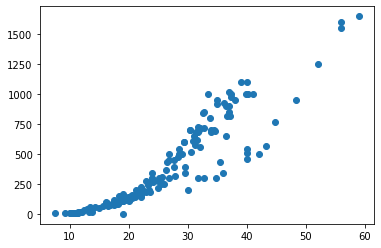

In [25]:
import matplotlib.pyplot as plt
plt.scatter(dataset["Length1"],dataset["Weight"])
plt.show()

In [26]:
dataset.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
